<a href="https://colab.research.google.com/github/gawandeakash/EDA_Hotel_Booking_Analysis_Almabetter/blob/main/hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
q=pd.read_csv('Hotel Bookings.csv')

In [ ]:
q.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
q.shape

(119390, 32)

In [ ]:
q.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
from sklearn.preprocessing import LabelEncoder
t = LabelEncoder()
q['hotel']=t.fit_transform(q['hotel'])
q['arrival_date_month']=t.fit_transform(q['arrival_date_month'])
q['meal']=t.fit_transform(q['meal'])
q['country']=t.fit_transform(q['country'])
q['market_segment']=t.fit_transform(q['market_segment'])
q['distribution_channel']=t.fit_transform(q['distribution_channel'])
q['reserved_room_type']=t.fit_transform(q['reserved_room_type'])
q['assigned_room_type']=t.fit_transform(q['assigned_room_type'])
q['deposit_type']=t.fit_transform(q['deposit_type'])
q['customer_type']=t.fit_transform(q['customer_type'])
q['reservation_status']=t.fit_transform(q['reservation_status'])
q['reservation_status_date']=t.fit_transform(q['reservation_status_date'])

In [ ]:
q['agent'].isnull().value_counts()

False    103050
True      16340
Name: agent, dtype: int64

In [ ]:
q['agent'].describe()

count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

In [ ]:
q['agent'].fillna(q['agent'].mean(), inplace = True)

In [ ]:
q['company'].isnull().value_counts()

True     112593
False      6797
Name: company, dtype: int64

In [ ]:
q['company'].describe()

count    6797.000000
mean      189.266735
std       131.655015
min         6.000000
25%        62.000000
50%       179.000000
75%       270.000000
max       543.000000
Name: company, dtype: float64

In [ ]:
q['company'].fillna(q['company'].mean(), inplace = True)

In [ ]:
q.shape

(119390, 32)

In [ ]:
q['children'].isnull().value_counts()

False    119386
True          4
Name: children, dtype: int64

In [ ]:
q=q.dropna(subset=['children'])
q.isnull().sum().sum()

0

In [ ]:
q.shape

(119386, 32)

In [ ]:
# q=q.drop('agent',axis=1)

In [ ]:
# q=q.drop('company',axis=1)

In [ ]:
q.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,86.693382,189.266735,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,0,86.693382,189.266735,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,86.693382,189.266735,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,304.000000,189.266735,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,240.000000,189.266735,0,2,98.0,0,1,1,123


<Figure size 1080x720 with 0 Axes>

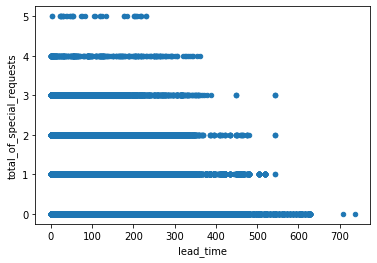

In [ ]:
var='lead_time'
data = pd.concat([q['total_of_special_requests'],q[var]], axis=1)
plt.figure(figsize=(15,10))
data.plot.scatter(x=var, y='total_of_special_requests');

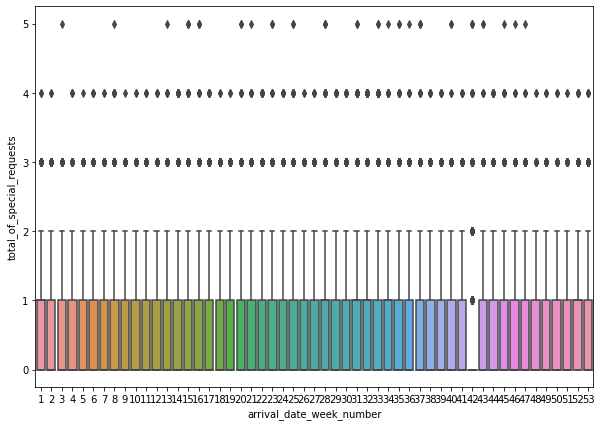

In [ ]:
var = 'arrival_date_week_number'
data = pd.concat([q['total_of_special_requests'], q[var]], axis=1)
f, ax = plt.subplots(figsize=(10,7))
fig = sns.boxplot(x=var, y='total_of_special_requests', data=data)

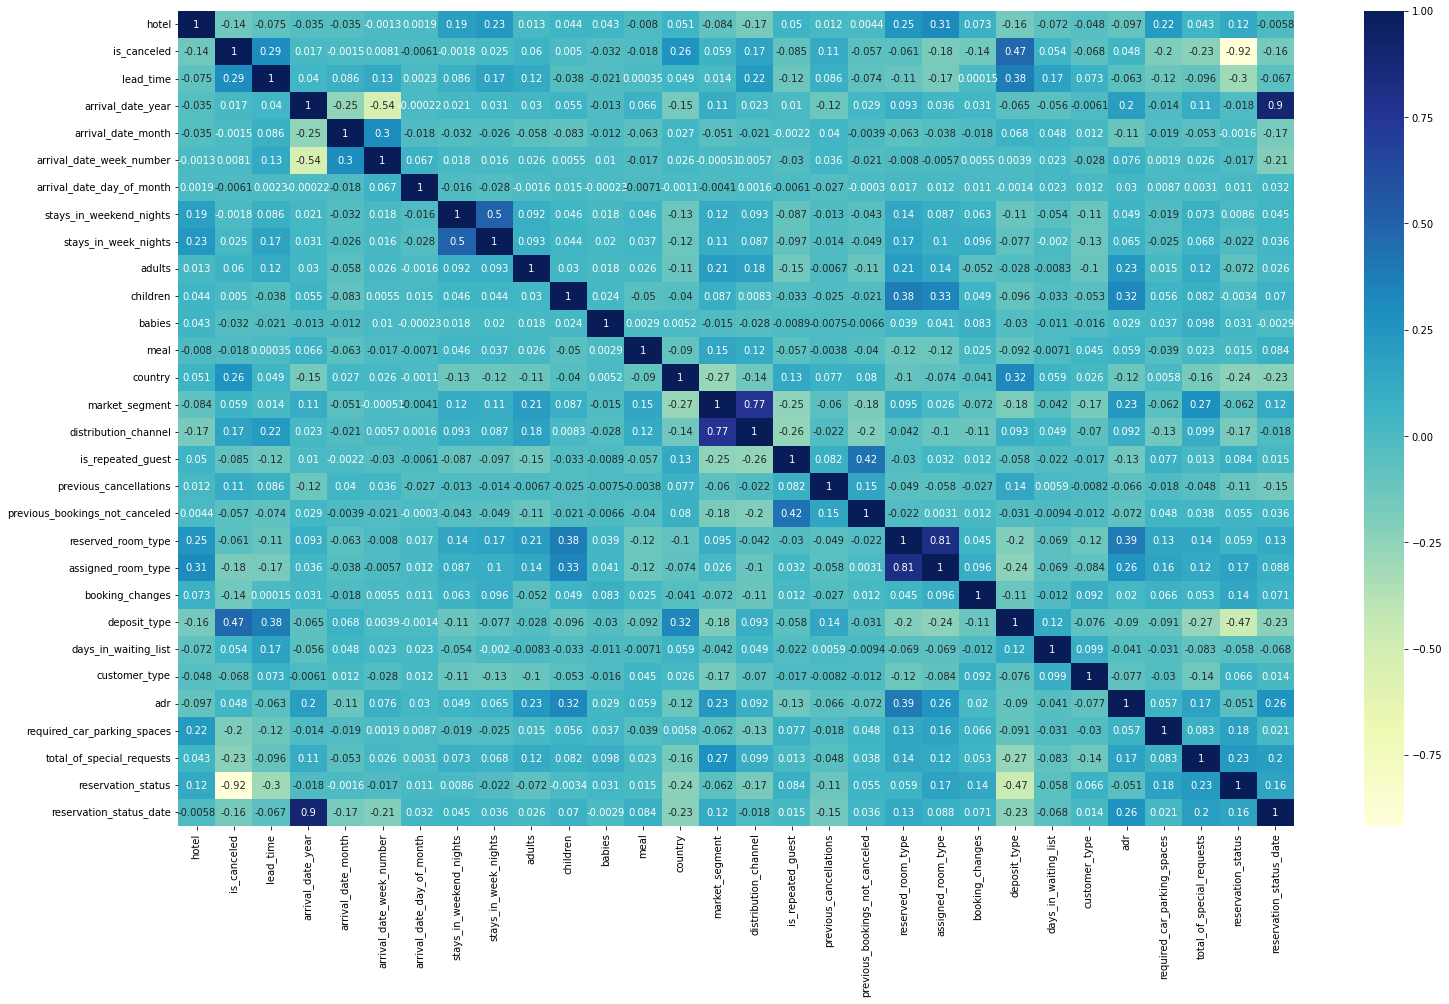

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(q.corr(),cmap="YlGnBu",annot = True);